In [1]:
from fastai.vision.all import *
from fastbook import *

In [2]:
#path = untar_data(dest = './images')/'images'
path = os.path.join('./images/')

def is_ah(x) : return x.parent.name

dls = ImageDataLoaders.from_path_func(
    path, get_image_files(path), num_workers=0 , valid_pct=0.2, seed=42,
    label_func=is_ah) # added num_workers = 0

precision = Precision()
recall = Recall()
f1score = F1Score()

learn = cnn_learner(dls, resnet34, metrics=[precision, recall, f1score])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.232885,0.176237,0.933333,08:08


epoch,train_loss,valid_loss,accuracy,time
0,0.100636,0.086724,0.968326,11:57


Find a suitable learning rate

In [ ]:
learn.lr_find()

Now you may want to continue fine-tuning with a good learning rate

In [ ]:
# learn.fine_tune(6, 6.309573450380412e-08)

In [ ]:
interp = learn.interpret()

In [ ]:
interp.plot_confusion_matrix()

PREDICT IF 0.1 SEC AUDIO CHUNK IS AN "AH" OR NOT

In [3]:
# uploader = widgets.FileUpload()
# uploader

In [4]:
# img = PILImage.create(uploader.data[0])
# is_ah,_,probs = learn.predict(img)
# print(f"Is this an AH?: {is_ah}.")
# print(f"Probability it's a AH: {probs[1].item():.6f}")

**Save the current learner**

In [5]:
# save_path = os.path.join('../../saved_models/model1.pth')
# learn.save(save_path)

**Load the model**

In [6]:
# load_path = os.path.join('../../saved_models/model1')

# learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
# learn1 = learn1.load(file=load_path, strict=False,remove_module=True)

**Now process a whole piece of audio**

Process the audio file 0.1 sec by 0.1 sec. In each iteration, create a spectrogram and predict whether it is an "ah" or not. Save all the predictions in a list. Find out the time locations of all the "ah-s" and cut the initial audio there.

In [65]:
import librosa
import matplotlib.pyplot as plt
import os
import glob
from pydub import AudioSegment
from pydub.utils import make_chunks
import io
from PIL import Image
import numpy as np
from scipy.io import wavfile

In [39]:
audio_path = os.path.join('./audio_full/test1.wav')
audio_full, rate = librosa.load(audio_path, sr=16000) # load and convert to 16 khz

In [9]:
len(audio_full)/16000/60 # this is the length of the audio in  minutes (16000 samples/amplitude values per second)

54.670570833333336

Process the audio file 0.1 sec by 0.1 sec. In each iteration, create a spectrogram and predict whether it is an "ah" or not. Save all the predictions in a list.

**Testing how images are extracted**

Testing the length of one 0.1 s chunk

In [85]:
path_test = os.path.join('./audiofiles_chunks/0/1chunk1.wav')
wav_t, rate_t = librosa.load(path_test, sr=16000)
print('librosa.load() imports ', len(wav_t), 'values for 0.1 sec')

librosa.load() imports  1600 values for 0.1 sec


This also means that `make_chunks()` exports 0.1 sec of audio for `chunk_length = 100` correctly

Comparing formats:
- `librosa.load[::1600]` (class 'numpy.ndarray')
- `AudioSegment` (class 'pydub.audio_segment.AudioSegment') --> `make_chunks` (pydub.audio_segment.AudioSegment object at 0x000001C255272D60)--> `export` (.wav) --> `librosa.load` (class 'numpy.ndarray')

In [111]:
librosa_chunk = audio_full[:320]
print('\n================================================\n')
print(type(librosa_chunk))
print('\n================================================\n')
print(librosa_chunk[258])
print('\n================================================\n')
print(len(librosa_chunk))



<class 'numpy.ndarray'>


1.1207606e-05


320


In [112]:
audio_seg = AudioSegment.from_file(audio_path, 'wav')

dst = os.path.join('./audiofiles_chunks/test_delete/test_delete.wav')
chunks = make_chunks(audio_seg, 20) # 0.1 sec = 100 ms
for chunk in chunks :
    chunk.export(dst, format='wav')
#     print('chunk(make_chunks) type is ', type(chunk))
#     print(chunk)
#     print(len(chunk))
    break

wav_from_seg, rate_from_seg = librosa.load(dst, sr=16000)
print('\n================================================\n')
print(type(wav_from_seg))
print('\n================================================\n')
print(wav_from_seg[258])
print('\n================================================\n')
print(len(wav_from_seg))



<class 'numpy.ndarray'>


1.1207606e-05


320


In [ ]:
# full_path = os.path.join('./audio_full/test1.wav')
# afull = AudioSegment.from_file(full_path)
# chunks = make_chunks(afull, 100) # 0.1 sec = 100 ms

# count = 0

# for chunk in chunks :
#     plt.figure(figsize=(0.97,1), dpi=298)
#     plt.specgram(chunk, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     plt.gca().set_axis_off() # remove the axis text
#     plt.savefig('./images/test/' + str(count) + '.jpg', format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
    
#     # convert the image from bytes to PIL
#     img = PILImage.create(buf)
#     # show the probability for this 0.1 piece of audio to be an "ah"
#     is_ah,_,probs = learn.predict(img)
#     timeline.append(is_ah)
    
#     plt.close('all')
#     buf.close()

In [12]:
# chunks = make_chunks(audio_full, 100) # 0.1 sec = 100 ms
# #chunks = tuple(chunks)

# for chunk in enumerate(chunks) :
#     print(len(chunk))
#     #audio = librosa.load(chunk, sr=16000)
#     chunk = tuple(chunk)
#     plt.figure(figsize=(0.97,1), dpi=298)
#     plt.specgram(chunk, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     plt.gca().set_axis_off() # remove the axis text
#     plt.savefig('./images/test/' + str(count) + '.jpg', format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
    
#     # convert the image from bytes to PIL
#     img = PILImage.create(buf)
#     # show the probability for this 0.1 piece of audio to be an "ah"
#     is_ah,_,probs = learn.predict(img)
#     timeline.append(is_ah)
    
#     plt.close('all')
#     buf.close()

C:\Users\Dicey\anaconda3\envs\audio\lib\site-packages\matplotlib\axes\_axes.py:7544: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


C:\Users\Dicey\anaconda3\envs\audio\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\Dicey\anaconda3\envs\audio\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\Dicey\anaconda3\envs\audio\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\Dicey\anaconda3\envs\audio\lib\site-packages\matplotlib\image.py:477: UserWarning: Warning: converting a masked element to nan.
  vrange = np.array([self.norm.vmin, self.norm.vmax],


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1204224 bytes. Buy new RAM!

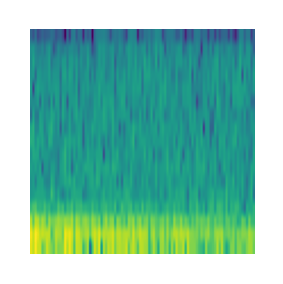

In [133]:
step = 1600 # 0.1 second steps
count = 0
timeline = []

for audio_chunk in audio_full[:1600000:1600] :
    count = count + 1
    stop = count * step # 1600, 3200, 4800, ...
    start = stop - step # 0, 1600, 3200, ...
    audio = audio_full[start:stop]

    plt.figure(figsize=(0.97,1), dpi=298)
    plt.specgram(audio, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
    plt.gca().set_axis_off() # remove the axis text
    # plt.savefig('./images/test/' + str(count) + '.jpg', format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
    
    # convert the figure to bytes
    buf = io.BytesIO()
    plt.savefig(buf, format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
    buf.seek(0)
    
    # convert the image from bytes to PIL
    img = PILImage.create(buf)
    # show the probability for this 0.1 piece of audio to be an "ah"
    is_ah,_,probs = learn.predict(img)
    timeline.append(is_ah)
    
    plt.close('all')
    buf.close()

In [14]:
# step = 1600 # 0.1 second steps
# count = 0
# timeline = []

# # change the second number '320000' to adjust how long a piece of processed audio should be
# for audio_chunk in audio_full[0][16000:64000:1600] :
#     count = count + 1
#     stop = count * step # 1600, 3200, 4800, ...
#     start = stop - step # 0, 1600, 3200, ...
#     audio = audio_full[0][start:stop]
    
#     plt.figure(figsize=(0.97,1), dpi=298)
#     plt.specgram(audio, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     plt.gca().set_axis_off() # remove the axis text
#     # THE PROBLEM: All the predictions are 0.
#     # Reason? Not sure if plots that are converted to bytes still have white space around which makes them unrecognizable 
#     # for the model.
#     plt.savefig('./images/test/' + str(count) + '.jpg', format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
    
#     # convert the figure to bytes
#     buf = io.BytesIO()
#     plt.savefig(buf, format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
#     buf.seek(0)
    
#     # convert the image from bytes to PIL
#     img = PILImage.create(buf)
#     # show the probability for this 0.1 piece of audio to be an "ah"
#     is_ah,_,probs = learn.predict(img)
#     timeline.append(is_ah)
#     print(is_ah, probs)
    
#     plt.close('all')
#     buf.close()

**Now let's make it fucking real**

In [15]:
# step = 1600 # 0.1 second steps
# count = 0
# timeline = []

# # change the second number '320000' to adjust how long a piece of processed audio should be
# for audio_chunk in audio_full[::1600] :
#     count = count + 1
#     stop = count * step # 1600, 3200, 4800, ...
#     start = stop - step # 0, 1600, 3200, ...
#     audio = audio_full[0][start:stop]
    
#     plt.figure(figsize=(0.97,1), dpi=298)
#     plt.specgram(audio, Fs=16000, NFFT=32, noverlap=16) # create a spectrogram
#     plt.gca().set_axis_off() # remove the axis text
#     # THE PROBLEM: All the predictions are 0.
#     # Reason? Not sure if plots that are converted to bytes still have white space around which makes them unrecognizable 
#     # for the model.
    
#     # convert the figure to bytes
#     buf = io.BytesIO()
#     plt.savefig(buf, format='jpg', dpi=298, pad_inches=0, bbox_inches='tight')
#     buf.seek(0)
    
#     # convert the image from bytes to PIL
#     img = PILImage.create(buf)
#     # show the probability for this 0.1 piece of audio to be an "ah"
#     is_ah,_,probs = learn.predict(img)
#     timeline.append(is_ah)
#     print(is_ah, probs)
    
#     plt.close('all')
#     buf.close()